<a href="https://colab.research.google.com/github/areeba71/CODSOFT/blob/main/Codsoft_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS FLOWER CLASSIFICATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


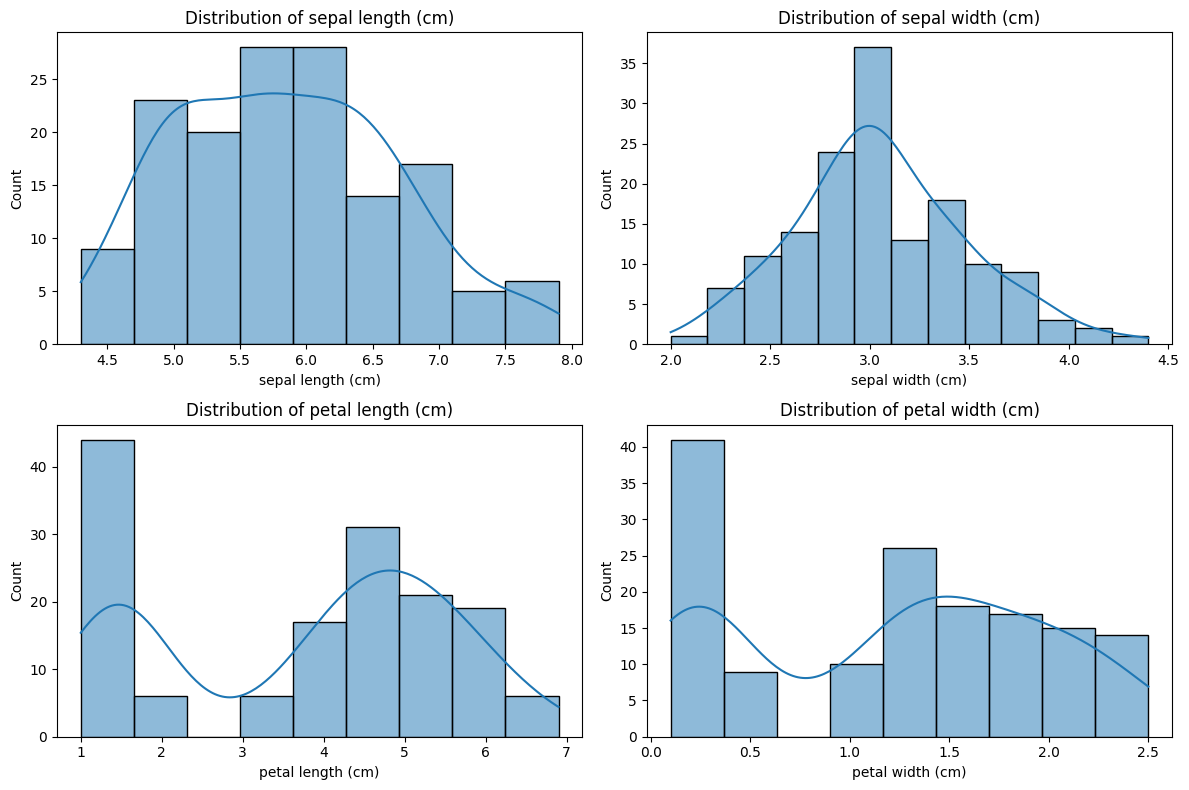

In [ ]:


# Convert the dataset into a pandas DataFrame for easier analysis
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])

# Display basic statistics
print(iris_df.describe())

# Visualize the distribution of each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()





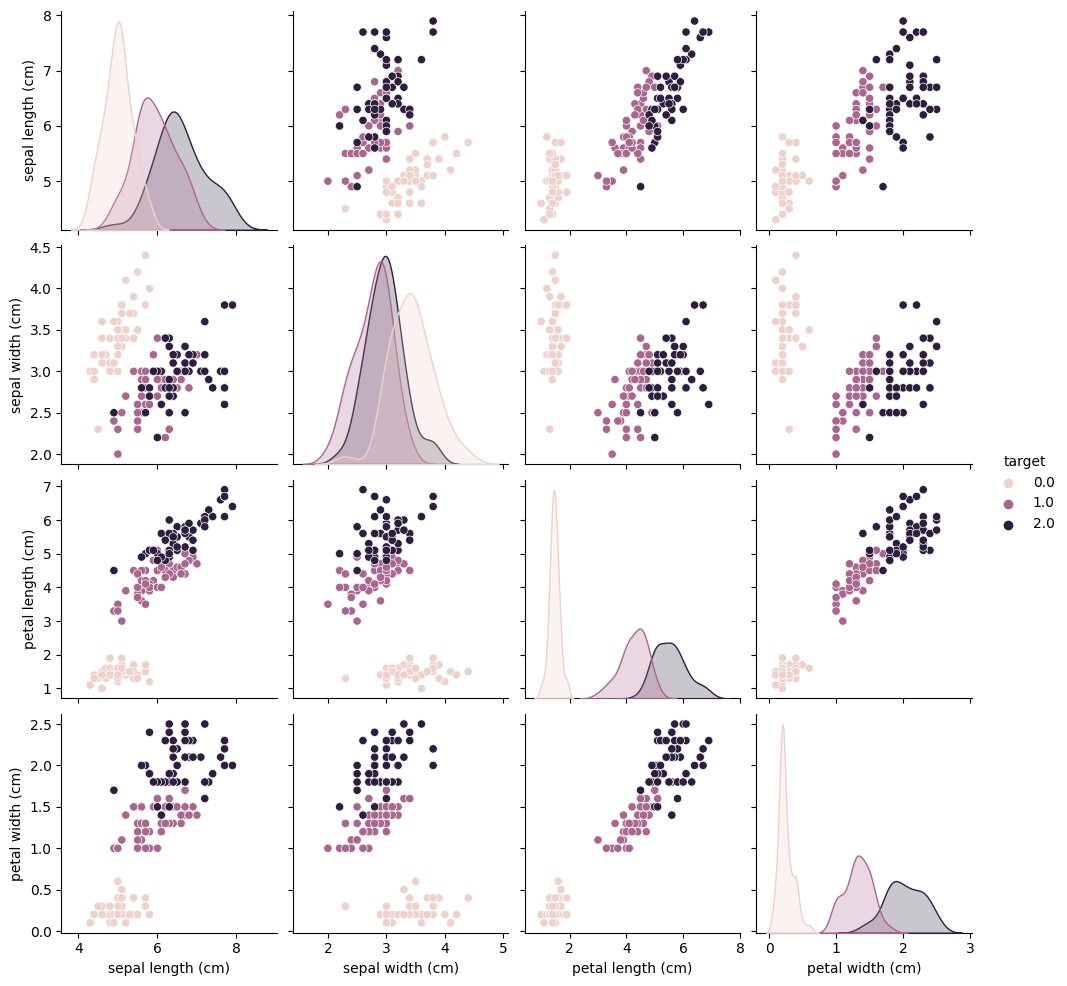

In [ ]:
# Visualize the relationships between features
sns.pairplot(iris_df, hue='target', diag_kind='kde')
plt.show()


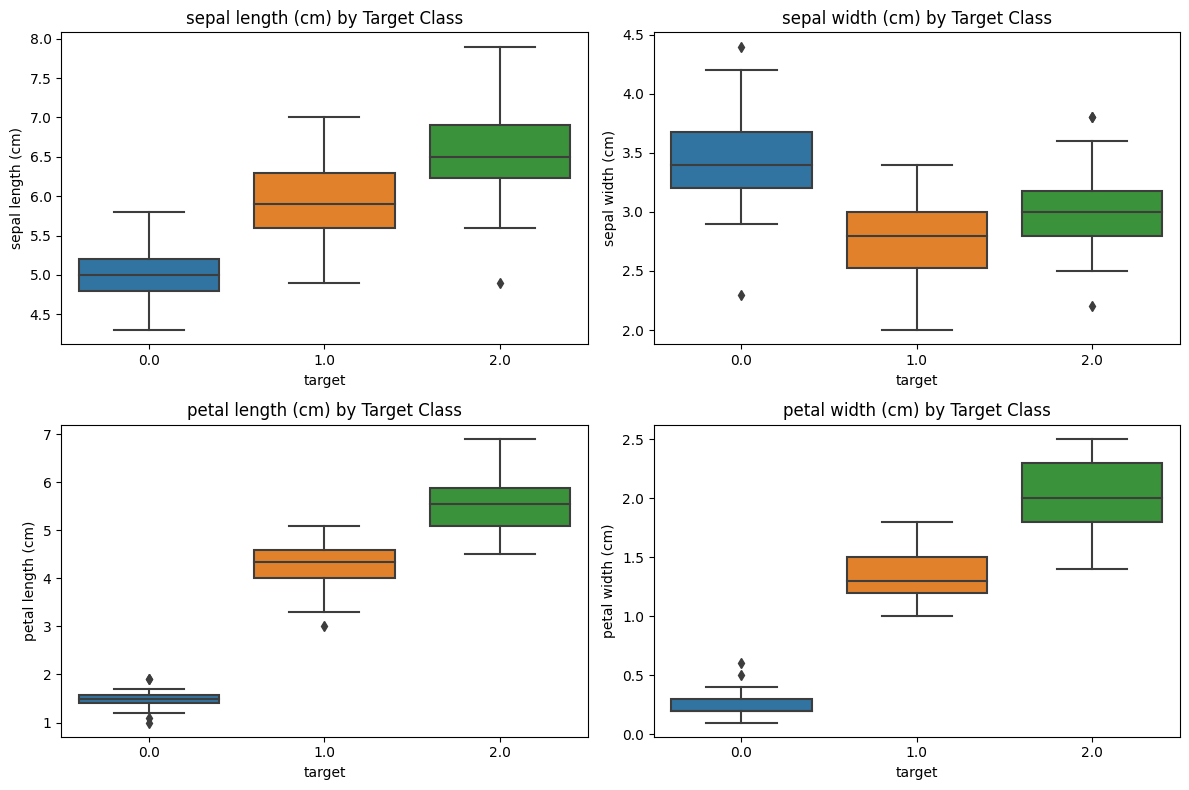

In [ ]:
# Box plot for each feature by target class
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris['feature_names']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=feature, data=iris_df)
    plt.title(f'{feature} by Target Class')
plt.tight_layout()
plt.show()



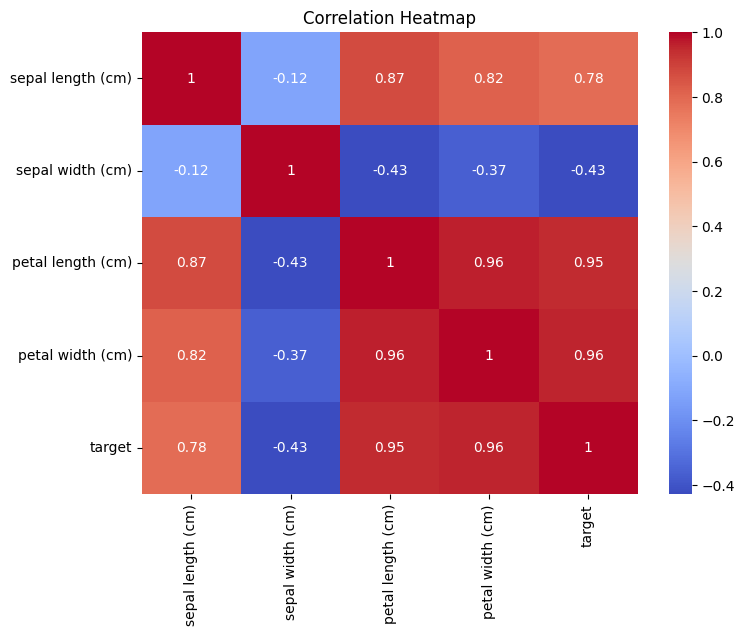

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing:

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection and Training:

In [ ]:
# Initialize the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Save the trained model
joblib.dump(knn, 'iris_model.pkl')


['iris_model.pkl']

# Model Evaluation:

In [ ]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Prediction

In [ ]:
# Example prediction
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # New sepal and petal measurements
prediction = knn.predict(new_data)
print(f'Predicted class: {iris.target_names[prediction][0]}')


Predicted class: setosa


The Iris dataset comprises measurements of four features for three different species of Iris flowers. These features include sepal length, sepal width, petal length, and petal width. The aim was to construct a machine learning model capable of accurately classifying Iris flowers based on these measurements. The dataset is frequently used for introductory classification tasks due to its simplicity and effectiveness in showcasing classification algorithms. We followed a structured process: first, we loaded the dataset, conducted exploratory data analysis to understand its characteristics, preprocessed the data by handling missing values and converting variables, selected a classification algorithm, trained the model, and evaluated its performance. In an example prediction, using new sepal and petal measurements, the model successfully predicted the species as "setosa". This workflow provides a fundamental approach to working with the Iris dataset and creating a reliable classification model for Iris flowers.